In [2]:
#Import the ibraries for EDA 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from heatmap import heatmap, corrplot
from PIL import Image

print('OK')

OK


In [3]:
#Import the file (train data set)
file = 'tw_merkel.xlsx'
xl = pd.ExcelFile(file)
print(xl.sheet_names)

['Sheet1']


In [4]:
tw_merkel = xl.parse('Sheet1')
tw_merkel

,id,language,tweet,label,issue
0,1,albanian,Merkel dhe Vuçiç diskutojnë për dialogun Kosov...,0,NaN
1,2,bosnian,"Merkel: ""Ne mogu da kažem da li će AstraZennec...",0,NaN
2,3,bosnian,Nemačka kancelarka Angela Merkel i lideri save...,0,NaN
3,4,bosnian,Ne mogu nikako da se naviknem na njegovu retor...,1,conspiracy theory
4,5,catalan,I si resultés que ERC ha fet la gran jugada de...,1,conspiracy theory
...,...,...,...,...,...
1495,1496,turkish,Sn Kiras konuya Akparti lideri diye giriş yapı...,0,NaN
1496,1497,turkish,Tabi tabi Almanyadan Yolla telgırafi Arkanda m...,0,NaN
1497,1498,turkish,Türkiye Cumhuriyeti yeni sistem cumhurbaşkanlı...,0,NaN
1498,1499,turkish,Yani uzun lafın kısası Recep Tayyip Erdoğan ab...,0,NaN


In [5]:
tw_merkel.head()

,id,language,tweet,label,issue
0,1,albanian,Merkel dhe Vuçiç diskutojnë për dialogun Kosov...,0,NaN
1,2,bosnian,"Merkel: ""Ne mogu da kažem da li će AstraZennec...",0,NaN
2,3,bosnian,Nemačka kancelarka Angela Merkel i lideri save...,0,NaN
3,4,bosnian,Ne mogu nikako da se naviknem na njegovu retor...,1,conspiracy theory
4,5,catalan,I si resultés que ERC ha fet la gran jugada de...,1,conspiracy theory


In [6]:
tw_merkel.tail()

,id,language,tweet,label,issue
1495,1496,turkish,Sn Kiras konuya Akparti lideri diye giriş yapı...,0,NaN
1496,1497,turkish,Tabi tabi Almanyadan Yolla telgırafi Arkanda m...,0,NaN
1497,1498,turkish,Türkiye Cumhuriyeti yeni sistem cumhurbaşkanlı...,0,NaN
1498,1499,turkish,Yani uzun lafın kısası Recep Tayyip Erdoğan ab...,0,NaN
1499,1500,turkish,Yarın yada öbür gün Merkel bırak der ve bırakı...,0,NaN


In [7]:
tw_merkel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1500 non-null   int64 
 1   language  1500 non-null   object
 2   tweet     1500 non-null   object
 3   label     1500 non-null   int64 
 4   issue     699 non-null    object
dtypes: int64(2), object(3)
memory usage: 58.7+ KB


In [8]:
tw_merkel.describe()

,id,label
count,1500.000000,1500.000000
mean,750.500000,0.466000
std,433.157015,0.499009
min,1.000000,0.000000
25%,375.750000,0.000000
50%,750.500000,0.000000
75%,1125.250000,1.000000
max,1500.000000,1.000000


In [9]:
#remove cloumn=id
tw_data = tw_merkel.drop(columns=['id'])
tw_data

,language,tweet,label,issue
0,albanian,Merkel dhe Vuçiç diskutojnë për dialogun Kosov...,0,NaN
1,bosnian,"Merkel: ""Ne mogu da kažem da li će AstraZennec...",0,NaN
2,bosnian,Nemačka kancelarka Angela Merkel i lideri save...,0,NaN
3,bosnian,Ne mogu nikako da se naviknem na njegovu retor...,1,conspiracy theory
4,catalan,I si resultés que ERC ha fet la gran jugada de...,1,conspiracy theory
...,...,...,...,...
1495,turkish,Sn Kiras konuya Akparti lideri diye giriş yapı...,0,NaN
1496,turkish,Tabi tabi Almanyadan Yolla telgırafi Arkanda m...,0,NaN
1497,turkish,Türkiye Cumhuriyeti yeni sistem cumhurbaşkanlı...,0,NaN
1498,turkish,Yani uzun lafın kısası Recep Tayyip Erdoğan ab...,0,NaN


In [10]:
tw_data["tweet"]

0       Merkel dhe Vuçiç diskutojnë për dialogun Kosov...
1       Merkel: "Ne mogu da kažem da li će AstraZennec...
2       Nemačka kancelarka Angela Merkel i lideri save...
3       Ne mogu nikako da se naviknem na njegovu retor...
4       I si resultés que ERC ha fet la gran jugada de...
                              ...                        
1495    Sn Kiras konuya Akparti lideri diye giriş yapı...
1496    Tabi tabi Almanyadan Yolla telgırafi Arkanda m...
1497    Türkiye Cumhuriyeti yeni sistem cumhurbaşkanlı...
1498    Yani uzun lafın kısası Recep Tayyip Erdoğan ab...
1499    Yarın yada öbür gün Merkel bırak der ve bırakı...
Name: tweet, Length: 1500, dtype: object

<AxesSubplot:>

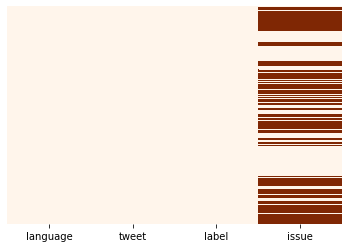

In [11]:
#null values visualization on heatmap
sns.heatmap(tw_data.isnull(), yticklabels = False, cbar = False, cmap="Oranges")

In [12]:
#fulling null values
tw_data.fillna(value = 'No Reason')

,language,tweet,label,issue
0,albanian,Merkel dhe Vuçiç diskutojnë për dialogun Kosov...,0,No Reason
1,bosnian,"Merkel: ""Ne mogu da kažem da li će AstraZennec...",0,No Reason
2,bosnian,Nemačka kancelarka Angela Merkel i lideri save...,0,No Reason
3,bosnian,Ne mogu nikako da se naviknem na njegovu retor...,1,conspiracy theory
4,catalan,I si resultés que ERC ha fet la gran jugada de...,1,conspiracy theory
...,...,...,...,...
1495,turkish,Sn Kiras konuya Akparti lideri diye giriş yapı...,0,No Reason
1496,turkish,Tabi tabi Almanyadan Yolla telgırafi Arkanda m...,0,No Reason
1497,turkish,Türkiye Cumhuriyeti yeni sistem cumhurbaşkanlı...,0,No Reason
1498,turkish,Yani uzun lafın kısası Recep Tayyip Erdoğan ab...,0,No Reason


In [13]:
#making changes permanent
tw_data.fillna(value = 'No Reason', inplace = True)

In [14]:
tw_data

,language,tweet,label,issue
0,albanian,Merkel dhe Vuçiç diskutojnë për dialogun Kosov...,0,No Reason
1,bosnian,"Merkel: ""Ne mogu da kažem da li će AstraZennec...",0,No Reason
2,bosnian,Nemačka kancelarka Angela Merkel i lideri save...,0,No Reason
3,bosnian,Ne mogu nikako da se naviknem na njegovu retor...,1,conspiracy theory
4,catalan,I si resultés que ERC ha fet la gran jugada de...,1,conspiracy theory
...,...,...,...,...
1495,turkish,Sn Kiras konuya Akparti lideri diye giriş yapı...,0,No Reason
1496,turkish,Tabi tabi Almanyadan Yolla telgırafi Arkanda m...,0,No Reason
1497,turkish,Türkiye Cumhuriyeti yeni sistem cumhurbaşkanlı...,0,No Reason
1498,turkish,Yani uzun lafın kısası Recep Tayyip Erdoğan ab...,0,No Reason


In [15]:
#add a new column for the length
tw_data['length'] = tw_data['tweet'].apply(len)

In [16]:
tw_data

,language,tweet,label,issue,length
0,albanian,Merkel dhe Vuçiç diskutojnë për dialogun Kosov...,0,No Reason,137
1,bosnian,"Merkel: ""Ne mogu da kažem da li će AstraZennec...",0,No Reason,91
2,bosnian,Nemačka kancelarka Angela Merkel i lideri save...,0,No Reason,130
3,bosnian,Ne mogu nikako da se naviknem na njegovu retor...,1,conspiracy theory,275
4,catalan,I si resultés que ERC ha fet la gran jugada de...,1,conspiracy theory,275
...,...,...,...,...,...
1495,turkish,Sn Kiras konuya Akparti lideri diye giriş yapı...,0,No Reason,279
1496,turkish,Tabi tabi Almanyadan Yolla telgırafi Arkanda m...,0,No Reason,118
1497,turkish,Türkiye Cumhuriyeti yeni sistem cumhurbaşkanlı...,0,No Reason,279
1498,turkish,Yani uzun lafın kısası Recep Tayyip Erdoğan ab...,0,No Reason,277


<AxesSubplot:ylabel='Frequency'>

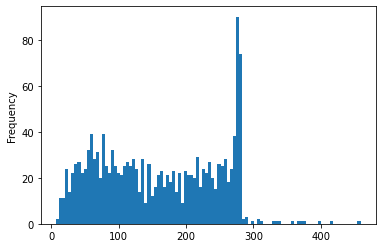

In [17]:
#visualing numeric data with frequency
tw_data['length'].plot(bins=100, kind='hist') 

In [18]:
#count how many tweets in which language
tw_data['language'].value_counts()

german           892
english          215
spanish          104
italian           70
turkish           68
polish            49
french            34
portuguese        25
dutch             15
crotian            8
catalan            3
bosnian            3
czech              3
finnish            2
slovenian          2
greek              1
luxembourgish      1
albanian           1
icelandic          1
russian            1
norwegian          1
latein             1
Name: language, dtype: int64

In [19]:
#describe for the longest and shortest tweet
tw_data.describe()

,label,length
count,1500.000000,1500.000000
mean,0.466000,158.414000
std,0.499009,86.147158
min,0.000000,7.000000
25%,0.000000,81.000000
50%,0.000000,156.000000
75%,1.000000,238.000000
max,1.000000,459.000000


In [20]:
#max tweet 
tw_data[tw_data['length'] == 459]['tweet'].iloc[0]

"Merkel: Germany's 'lockdown light' to stretch into January | DW | 0... (http://DW.COM) Germany federal and state governments have agreed to extend the country's current partial lockdown unt... Add your highlights: https://briefly.co/anchor/Germany_politics/story/merkel-germanys-lockdown-light-to-stretch-into-january--dw- 02122020?f=limburger&utm_source=Twitter&utm_medium=autotweet&utm_content=unhighlighted&utm_campaign=Germany_politics… #Germany #politics"

In [21]:
#min tweet
tw_data[tw_data['length'] == 7]['tweet'].iloc[0]

'Merkel!'

In [22]:
positive = tw_data[tw_data['label']==0]
positive.head()

,language,tweet,label,issue,length
0,albanian,Merkel dhe Vuçiç diskutojnë për dialogun Kosov...,0,No Reason,137
1,bosnian,"Merkel: ""Ne mogu da kažem da li će AstraZennec...",0,No Reason,91
2,bosnian,Nemačka kancelarka Angela Merkel i lideri save...,0,No Reason,130
7,crotian,Danasnji dan je bio jako veliki.. I ubiti od v...,0,No Reason,263
8,crotian,Hoce Srbija da joj placam porez jer radim lega...,0,No Reason,158


In [23]:
negative = tw_data[tw_data['label']==1]
negative.head()

,language,tweet,label,issue,length
3,bosnian,Ne mogu nikako da se naviknem na njegovu retor...,1,conspiracy theory,275
4,catalan,I si resultés que ERC ha fet la gran jugada de...,1,conspiracy theory,275
5,catalan,"Sra Merkel, voste ès sabia i sab molt bé, que ...",1,insult,86
6,catalan,Merkel claudica davant Erdogan després d’haver...,1,political criticism,124
14,crotian,Ali mi odmah Angela Merkel izbode živac,1,insult,39


In [24]:
#collecting negative tweets together for wodcloud
negative_list = negative['tweet'].tolist()
negative_sentences_as_one_string = ''.join(negative_list)
negative_sentences_as_one_string

'Ne mogu nikako da se naviknem na njegovu retoriku, koja u sebi nema ni diplomatije, ni nivoa.Nije mu jasno da se ponavljanjem uvreda spušta na nivo onih koji su ih izgovorili i da se poistovećuje sa njima.Zamisli da kancelarka Merkel počne da ponavlja šta sve kažu za nju... I si resultés que ERC ha fet la gran jugada de dissimular excelsa …? I un dia, de cop, obren els cels … Però posen un conseller d\'exteriors que no parla cap idioma estranger i moltes vegades sembla poc qualificat. Un 007 amb la Merkel. I segueixen afegint altres per l\'estil.Sra Merkel, voste ès sabia i sab molt bé, que el pinocho, seguira amb els seus, contesMerkel claudica davant Erdogan després d’haver claudicat davant Hongria i Polònia. Ni Alemanya salvarà la UE de la implosió.Ali mi odmah Angela Merkel izbode živacČlověk už si ani v klidu nemůže zajít na gay bunga bunga, aby na něj Merkel něco neušila!Beste Nederlanders wij weten van hem veel beloftes en kleine of geen invulling doet hij is blijft de Pinokkio

In [25]:
from stop_words import get_stop_words

In [26]:
stopwords_eng = get_stop_words('english')
stopwords_eng

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "s

In [27]:
stopwords = get_stop_words('german')
stopwords

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'das',
 'dass',
 'dasselbe',
 'dazu',
 'daß',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'dem',
 'demselben',
 'den',
 'denn',
 'denselben',
 'der',
 'derer',
 'derselbe',
 'derselben',
 'des',
 'desselben',
 'dessen',
 'dich',
 'die',
 'dies',
 'diese',
 'dieselbe',
 'dieselben',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'dir',
 'doch',
 'dort',
 'du',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'es',
 'etwas',
 'euch',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 'hier',
 'hin',
 'h

In [28]:
len(stopwords)

232

In [29]:
from wordcloud import WordCloud, STOPWORDS

In [30]:
#Uniting german and english stopwords and adding words 'Merkel','Angela','Frau'
stopwords = get_stop_words('german')
stopwords = set(stopwords)
stopwords.update(["Frau","Angela","Merkel","a","about","above", "after", "again", "against", "all", "am", "an", "and", "any", "are","aren't",
"as","at","be","because","been","before","being","below","between","both","but","by","can't","cannot","could","couldn't", "did",
"didn't","do","does","doesn't","doing","don't","down","during","each","few","for","from","further","had","hadn't","has","hasn't",
"have","haven't","having","he","he'd","he'll","he's","her","here","here's","hers","herself","him","himself","his","how","how's",
"i","i'd","i'll","i'm","i've","if","in","into","is","isn't","it","it's","its","itself","let's","me","more","most","mustn't","my",
"myself","no","nor","not","of","off","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same",
"shan't","she","she'd","she'll","she's","should","shouldn't","so","some","such","than","that","that's","the","their","theirs","them",
"themselves","then","there","there's","these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","wasn't","we","we'd","we'll","we're","we've","were","weren't","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"won't","would","wouldn't","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"])

In [31]:
len(stopwords)

404

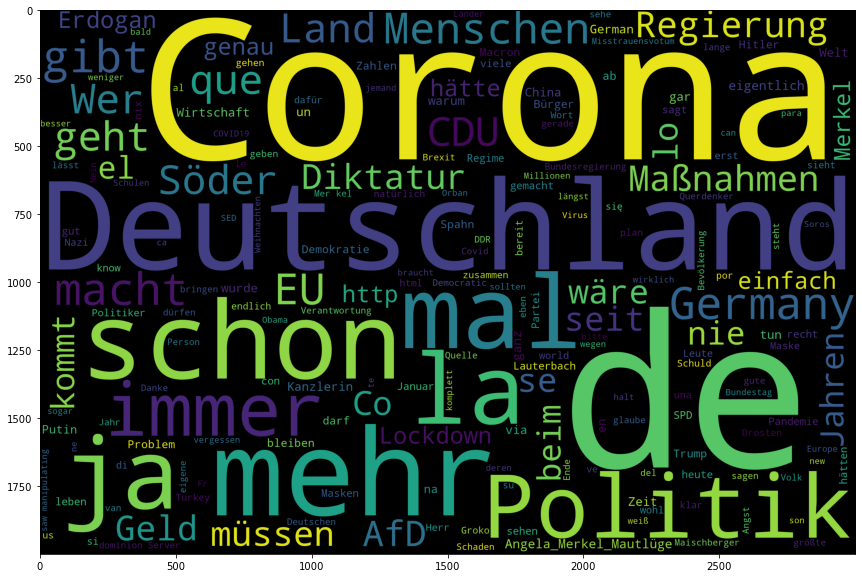

In [122]:
#wordCloud negative

wc = WordCloud(stopwords=stopwords, width=3000, height=2000).generate(negative_sentences_as_one_string)
plt.figure(figsize=(15,10))
plt.imshow(wc)

In [32]:
#To see all the words in WordCloud
WordCloud().process_text(negative_sentences_as_one_string)

{'ne': 6,
 'mogu': 1,
 'nikako': 1,
 'da': 205,
 'se': 17,
 'naviknem': 1,
 'na': 12,
 'njegovu': 1,
 'retoriku': 1,
 'koja': 1,
 'sebi': 1,
 'nema': 1,
 'ni': 5,
 'diplomatije': 1,
 'nivoa': 1,
 'Nije': 1,
 'mu': 1,
 'jasno': 1,
 'ponavljanjem': 1,
 'uvreda': 1,
 'spušta': 1,
 'nivo': 1,
 'onih': 1,
 'koji': 1,
 'su': 8,
 'ih': 1,
 'izgovorili': 1,
 'poistovećuje': 1,
 'sa': 1,
 'njima': 1,
 'Zamisli': 1,
 'kancelarka': 1,
 'Merkel': 499,
 'počne': 1,
 'ponavlja': 1,
 'šta': 1,
 'sve': 1,
 'kažu': 1,
 'za': 3,
 'nju': 1,
 'si': 9,
 'resultés': 1,
 'que': 22,
 'ERC': 1,
 'ha': 2,
 'fet': 1,
 'la': 36,
 'gran': 1,
 'jugada': 1,
 'de': 93,
 'dissimular': 1,
 'excelsa': 1,
 'un': 41,
 'dia': 1,
 'cop': 1,
 'obren': 1,
 'cels': 1,
 'Però': 1,
 'posen': 1,
 'conseller': 1,
 "d'exteriors": 1,
 'parla': 1,
 'cap': 1,
 'idioma': 1,
 'estranger': 1,
 'moltes': 1,
 'vegades': 1,
 'sembla': 1,
 'poc': 1,
 'qualificat': 1,
 'amb': 2,
 'segueixen': 1,
 'afegint': 1,
 'altres': 1,
 'per': 5,
 "l'est

In [33]:
#key words ind WordCloud 
print(WordCloud().process_text(negative_sentences_as_one_string)['Adolf'])
print(WordCloud().process_text(negative_sentences_as_one_string)['Hitler'])
print(WordCloud().process_text(negative_sentences_as_one_string)['Nazi'])


4
11
9


In [34]:
positive_list = positive['tweet'].tolist()
positive_sentences_as_one_string = ''.join(positive_list)
positive_sentences_as_one_string

'Merkel dhe Vuçiç diskutojnë për dialogun Kosovë-Serbi - https://struga.info/rajoni/merkel-dhe-vucic-diskutojne-per-dialogun-kosove-serbi/Merkel: "Ne mogu da kažem da li će AstraZenneca vakcina biti dostupna u Q1 sledeće godine."Nemačka kancelarka Angela Merkel i lideri saveznih država odlučili su da produže restrikcije uvedene zbog pandemije do 10. januaraDanasnji dan je bio jako veliki.. I ubiti od velike vaznosti.. Razgovor sa jednom elokventnom.. mentalno - snaznom i dugovecnoo ancelarkom Angelom Merkel.. Cetiri znacenja je imao nas razgovor.. Kao ponovna moja podrška kaze zadovoljna ekonomija rastu a!! @avucicHoce Srbija da joj placam porez jer radim legalno u Nemackoj, gde uredno placam aj pa trazite sami od Merkel da vam placam dva poreza, da vidim sta ce da kazeMERKEL POTVRDILA / Iako je usporen dnevni rast broja zaraženih, Njemačka je danas prijavila rekordni dnevni broj preminulih od početka pandemijeNisam znala da nam je ovako dobro ide, a ni Merkel nije znala. Večeras smo s

In [35]:
#for positive WordCloud with image_mask 
#First: chech the values of np.array 
merkel_mask = np.array(Image.open("merkel.png"))
merkel_mask

array([[[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       ...,

       [[ 11,  22,  33, 255],
        [ 11,  23,  33, 255],
        [ 11,  22,  32, 255],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[ 12,  23,  34, 255],
        [ 12,  23,  34, 255],
        [ 12,  24,  34, 255],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[ 13

<img src="merkel.PNG">

In [36]:
def transform_mask(val):
    if val.any() == 0:
        return 255
    else:
        return val.any()    

In [37]:
transformed_merkel_mask = np.ndarray((merkel_mask.shape[0],merkel_mask.shape[1]), np.int32)

for i in range(len(merkel_mask)):
    transformed_merkel_mask[i] = list(map(transform_mask, merkel_mask[i]))

In [38]:
transformed_merkel_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  1,   1,   1, ..., 255, 255, 255],
       [  1,   1,   1, ..., 255, 255, 255],
       [  1,   1,   1, ..., 255, 255, 255]])

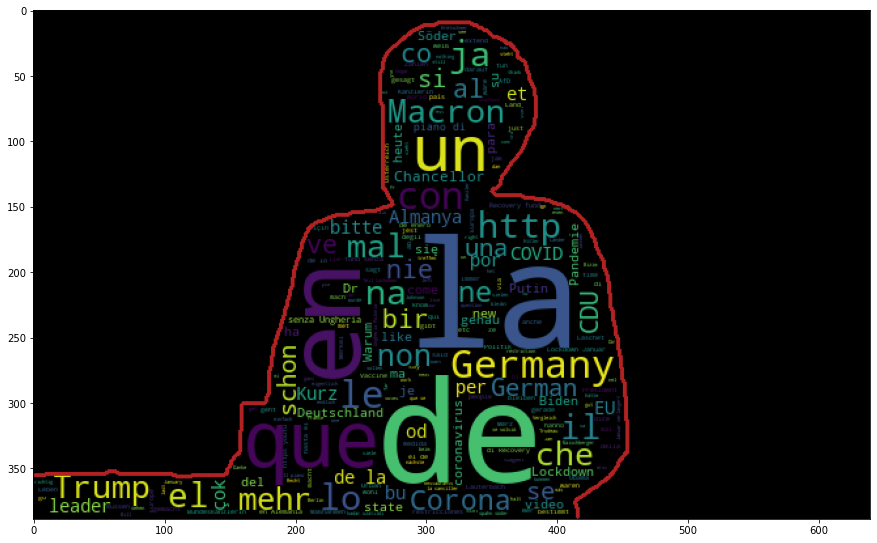

In [39]:
wc = WordCloud(stopwords=stopwords, width=3000, height=2000, background_color="black", max_words=1000, mask=transformed_merkel_mask,
               contour_width=3, contour_color='firebrick').generate(positive_sentences_as_one_string)

plt.figure(figsize=(15,10))
plt.imshow(wc)


In [40]:
negative['language'].sum()

'bosniancatalancatalancatalancrotianczechdutchdutchdutchdutchdutchdutchdutchenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishfinnishfinnishfrenchfrenchfrenchfrenchfrenchfrenchfrenchfrenchfrenchgermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermangermange

In [41]:
# negative tweets in a group by pandas 
language_group_negative = negative.groupby('language')
language_group_negative

In [42]:
language_group_negative.sum()

,label,length
language,,
bosnian,1,275
catalan,3,485
crotian,1,39
czech,1,89
dutch,7,994
english,86,13691
finnish,2,458
french,9,1292
german,524,94530


In [43]:
#which language has been tweeted longer?
language_group_negative.mean()

,label,length
language,,
bosnian,1.0,275.000000
catalan,1.0,161.666667
crotian,1.0,39.000000
czech,1.0,89.000000
dutch,1.0,142.000000
english,1.0,159.197674
finnish,1.0,229.000000
french,1.0,143.555556
german,1.0,180.400763


C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='language'>

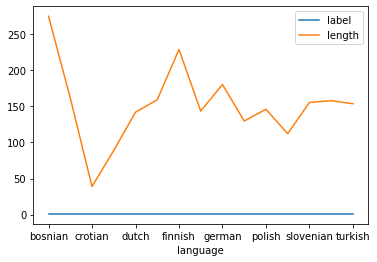

In [44]:
#visualize average messages by language
negative.set_index('language', inplace=False)
language_group_negative.mean().plot(legend=True)

In [45]:
#negative tweets waer for languages

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


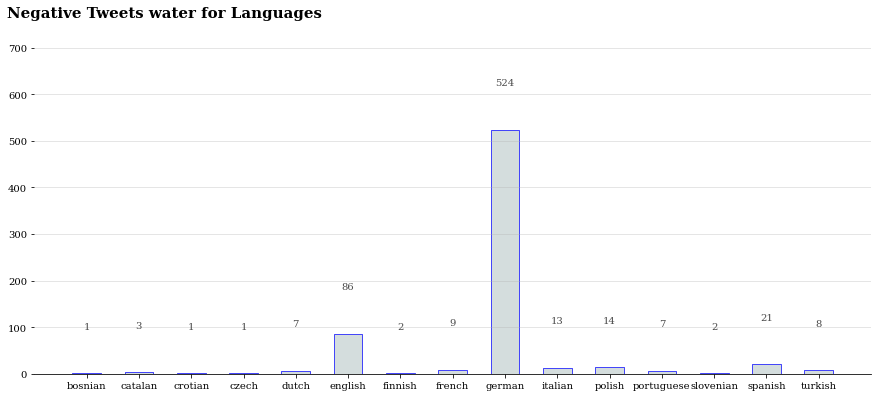

In [46]:
fig, ax = plt.subplots(1,1, figsize=(15, 6))
data_q1 = negative['language'].value_counts().sort_index()
ax.bar(data_q1.index, data_q1, width=0.55, 
       edgecolor='blue', color='#d4dddd',
       linewidth=0.7)

for i in data_q1.index:
    ax.annotate(f"{data_q1[i]}", 
                   xy=(i, data_q1[i] + 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylim(0, 700)    
ax.set_xticklabels(data_q1.index, fontfamily='serif')
ax.set_yticklabels(np.arange(0, 701, 100),fontfamily='serif')
fig.text(0.1, 0.95, 'Negative Tweets water for Languages', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    
plt.show()

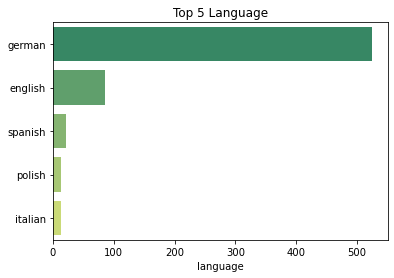

In [47]:
# plot the top 5 languages
sns.barplot(y=negative['language'].value_counts()[:5].index, x=negative['language'].value_counts()[:5],palette='summer')
plt.title('Top 5 Language');

In [48]:
positive['language'].sum()

'albanianbosnianbosniancrotiancrotiancrotiancrotiancrotiancrotiancrotianczechczechdutchdutchdutchdutchdutchdutchdutchdutchenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglishenglisheng

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


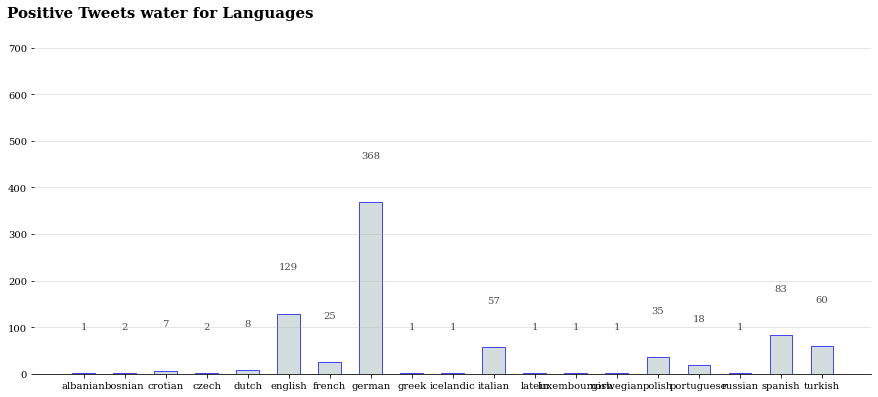

In [49]:
#positive tweets water for languages
fig, ax = plt.subplots(1,1, figsize=(15, 6))
data_q1 = positive['language'].value_counts().sort_index()
ax.bar(data_q1.index, data_q1, width=0.55, 
       edgecolor='blue', color='#d4dddd',
       linewidth=0.7)

for i in data_q1.index:
    ax.annotate(f"{data_q1[i]}", 
                   xy=(i, data_q1[i] + 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylim(0, 700)    
ax.set_xticklabels(data_q1.index, fontfamily='serif')
ax.set_yticklabels(np.arange(0, 701, 100),fontfamily='serif')
fig.text(0.1, 0.95, 'Positive Tweets water for Languages', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    
plt.show()
                   

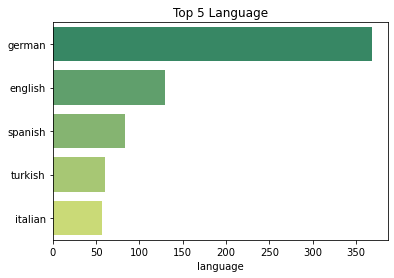

In [50]:
# plot the top 5 languages
sns.barplot(y=positive['language'].value_counts()[:5].index, x=positive['language'].value_counts()[:5],palette='summer')
plt.title('Top 5 Language');

####  Analysis of Issue  & Percentage rate creation 

In [51]:
#Issue generel distrubition

In [52]:
order = tw_data['issue'].value_counts
order

<bound method IndexOpsMixin.value_counts of 0               No Reason
1               No Reason
2               No Reason
3       conspiracy theory
4       conspiracy theory
              ...        
1495            No Reason
1496            No Reason
1497            No Reason
1498            No Reason
1499            No Reason
Name: issue, Length: 1500, dtype: object>

<AxesSubplot:xlabel='issue', ylabel='count'>

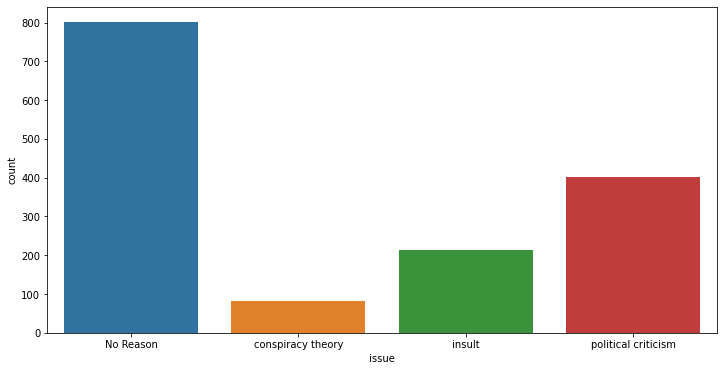

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(x='issue',data=tw_data)

In [54]:
issue_negative = tw_data[tw_data['issue']!='No Reason']
issue_negative

,language,tweet,label,issue,length
3,bosnian,Ne mogu nikako da se naviknem na njegovu retor...,1,conspiracy theory,275
4,catalan,I si resultés que ERC ha fet la gran jugada de...,1,conspiracy theory,275
5,catalan,"Sra Merkel, voste ès sabia i sab molt bé, que ...",1,insult,86
6,catalan,Merkel claudica davant Erdogan després d’haver...,1,political criticism,124
14,crotian,Ali mi odmah Angela Merkel izbode živac,1,insult,39
...,...,...,...,...,...
1435,turkish,COVİD 19 hakkında bir video.. Ne zaman biteceğ...,1,conspiracy theory,100
1436,turkish,Şimdi sayın sevgili Merkel ülkesi İsrailin bu ...,1,political criticism,222
1437,turkish,ANGELA MERKEL HİTLER'İN KIZI VE HİTLER ROTHSCH...,1,conspiracy theory,217
1438,turkish,Örnekle uyuşmuyor olabilir ama Merkel ve Marga...,1,political criticism,177


In [55]:
issue_negative.mean()

label       1.000000
length    173.430615
dtype: float64

In [56]:
issue_positive = tw_data[tw_data['issue']=='No Reason']
issue_positive

,language,tweet,label,issue,length
0,albanian,Merkel dhe Vuçiç diskutojnë për dialogun Kosov...,0,No Reason,137
1,bosnian,"Merkel: ""Ne mogu da kažem da li će AstraZennec...",0,No Reason,91
2,bosnian,Nemačka kancelarka Angela Merkel i lideri save...,0,No Reason,130
7,crotian,Danasnji dan je bio jako veliki.. I ubiti od v...,0,No Reason,263
8,crotian,Hoce Srbija da joj placam porez jer radim lega...,0,No Reason,158
...,...,...,...,...,...
1495,turkish,Sn Kiras konuya Akparti lideri diye giriş yapı...,0,No Reason,279
1496,turkish,Tabi tabi Almanyadan Yolla telgırafi Arkanda m...,0,No Reason,118
1497,turkish,Türkiye Cumhuriyeti yeni sistem cumhurbaşkanlı...,0,No Reason,279
1498,turkish,Yani uzun lafın kısası Recep Tayyip Erdoğan ab...,0,No Reason,277


In [57]:
issue_positive.mean()

label       0.000000
length    145.309613
dtype: float64

In [58]:
issue_group_negative = negative.groupby('issue')
issue_group_negative

In [59]:
issue_group_negative.sum()

,label,length
issue,,
conspiracy theory,82,13996
insult,214,29569
political criticism,403,77663


In [60]:
issue_group_negative.count()

,language,tweet,label,length
issue,,,,
conspiracy theory,82,82,82,82
insult,214,214,214,214
political criticism,403,403,403,403


In [61]:
issue_group_negative.size()

issue
conspiracy theory       82
insult                 214
political criticism    403
dtype: int64

#### Negative Comments by Language

In [62]:
language_order = negative['language'].value_counts()[:6].index
language_issue = negative[['issue','language']].groupby('language')['issue'].value_counts().unstack().loc[language_order]
language_issue['sum'] = language_issue.sum(axis=1)
language_ratio = (language_issue.T / language_issue['sum']).T[['conspiracy theory', 'insult', 'political criticism']]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


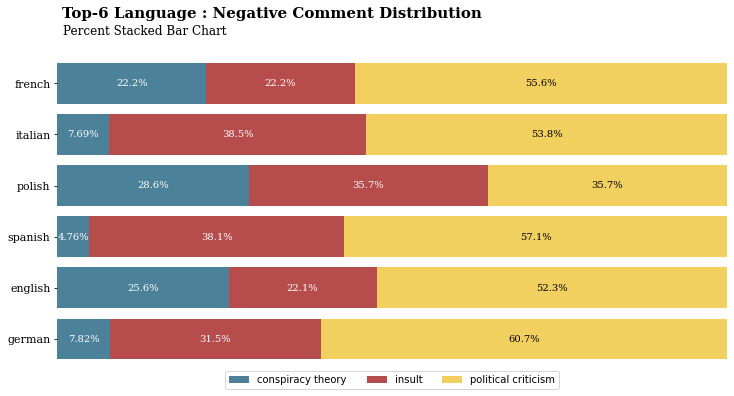

In [192]:
fig, ax = plt.subplots(1,1,figsize=(12, 6),)

ax.barh(language_ratio.index, language_ratio['conspiracy theory'], 
        color='#004c70', alpha=0.7, label='conspiracy theory')
ax.barh(language_ratio.index, language_ratio['insult'], left=language_ratio['conspiracy theory'], 
        color='#990000', alpha=0.7, label='insult')
ax.barh(language_ratio.index, language_ratio['political criticism'], left=language_ratio['conspiracy theory']+language_ratio['insult'], 
        color='#edbc1d', alpha=0.7, label='political criticism')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(language_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in language_ratio.index:
    ax.annotate(f"{language_ratio['conspiracy theory'][i]*100:.3}%", 
                   xy=(language_ratio['conspiracy theory'][i]/2, i),
                   va = 'center', ha='center',fontsize=10, fontweight='light', fontfamily='serif',
                   color='white')
for i in language_ratio.index:
    ax.annotate(f"{language_ratio['insult'][i]*100:.3}%", 
                   xy=(language_ratio['conspiracy theory'][i]+language_ratio['insult'][i]/2, i),
                   va = 'center', ha='center',fontsize=10, fontweight='light', fontfamily='serif',
                   color='white')
for i in language_ratio.index:
    ax.annotate(f"{language_ratio['political criticism'][i]*100:.3}%", 
                   xy=(language_ratio['conspiracy theory'][i]+language_ratio['insult'][i]+language_ratio['political criticism'][i]/2, i),
                   va = 'center', ha='center',fontsize=10, fontweight='light', fontfamily='serif',
                   color='black')    
#+language_ratio['insult'][i]
fig.text(0.13, 0.95, 'Top-6 Language : Negative Comment Distribution', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.91, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))
plt.show()

#### Positive Comments by Language

In [63]:
language_order2 = positive['language'].value_counts()[:6].index
language_issue2 = positive[['issue','language']].groupby('language')['issue'].value_counts().unstack().loc[language_order2]
language_issue2['sum'] = language_issue2.sum(axis=1)

In [64]:
language_issue2.style.background_gradient(cmap='Greens')

issue,No Reason,sum
german,368,368
english,129,129
spanish,83,83
turkish,60,60
italian,57,57
polish,35,35


In [201]:
#!pip install palettable

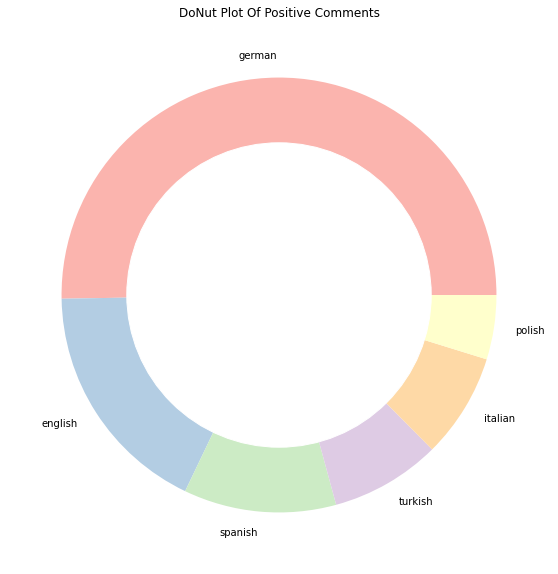

In [60]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.rcParams['text.color'] = 'black'
plt.pie(language_issue2['sum'],labels=['german','english','spanish','turkish','italian','polish'], colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Positive Comments')
plt.show()
#labels=positive.issue,

## NLP Processing

In [44]:
# NLP / Text specific imports
import nltk
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

#nlp = spacy.load('en_core_web_sm',disable=['parser','tagger','ner'])

# NLP - Text Cleaning
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# regular expression
import re

# string operations
import string

# ML Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# cross validation
from sklearn.model_selection import cross_val_score,cross_val_predict,KFold,RepeatedStratifiedKFold

# Model Fine Tuning
from sklearn.model_selection import GridSearchCV

# Pipeline
from sklearn.pipeline import Pipeline

# keras
from keras.utils import to_categorical

# Model evaluation metrics
from sklearn.metrics import classification_report,f1_score,accuracy_score,precision_score,recall_score



print('All imported!')

C:\Users\User\Anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
Using TensorFlow backend.


All imported!


In [45]:
tweet_punct_removed = []
for char in negative_sentences_as_one_string:
    if char not in string.punctuation:
        tweet_punct_removed.append(char)
        
        
tweet_punct_removed_join = ''.join(tweet_punct_removed)
tweet_punct_removed_join

'Ne mogu nikako da se naviknem na njegovu retoriku koja u sebi nema ni diplomatije ni nivoaNije mu jasno da se ponavljanjem uvreda spušta na nivo onih koji su ih izgovorili i da se poistovećuje sa njimaZamisli da kancelarka Merkel počne da ponavlja šta sve kažu za nju I si resultés que ERC ha fet la gran jugada de dissimular excelsa … I un dia de cop obren els cels … Però posen un conseller dexteriors que no parla cap idioma estranger i moltes vegades sembla poc qualificat Un 007 amb la Merkel I segueixen afegint altres per lestilSra Merkel voste ès sabia i sab molt bé que el pinocho seguira amb els seus contesMerkel claudica davant Erdogan després d’haver claudicat davant Hongria i Polònia Ni Alemanya salvarà la UE de la implosióAli mi odmah Angela Merkel izbode živacČlověk už si ani v klidu nemůže zajít na gay bunga bunga aby na něj Merkel něco neušilaBeste Nederlanders wij weten van hem veel beloftes en kleine of geen invulling doet hij is blijft de Pinokkio van Nederland pas op dat

In [56]:
tweet_punct_removed_join_clean = [word for word in tweet_punct_removed_join.split() if word.lower() not in stopwords]   

In [57]:
len(tweet_punct_removed_join)

116554

In [58]:
tweet_joined = ' '.join(tweet_punct_removed_join_clean)  # Only important (no so common) words are left
tweet_joined

'Ne mogu nikako se naviknem na njegovu retoriku koja u sebi nema ni diplomatije ni nivoaNije mu jasno se ponavljanjem uvreda spušta na nivo onih koji su ih izgovorili se poistovećuje sa njimaZamisli kancelarka Merkel počne ponavlja šta sve kažu za nju si resultés que ERC ha fet la gran jugada de dissimular excelsa … un dia de cop obren els cels … Però posen un conseller dexteriors que parla cap idioma estranger moltes vegades sembla poc qualificat Un 007 amb la Merkel segueixen afegint altres per lestilSra Merkel voste ès sabia sab molt bé que el pinocho seguira amb els seus contesMerkel claudica davant Erdogan després d’haver claudicat davant Hongria Polònia Ni Alemanya salvarà la UE de la implosióAli mi odmah Angela Merkel izbode živacČlověk už si ani v klidu nemůže zajít na gay bunga bunga aby na něj Merkel něco neušilaBeste Nederlanders wij weten van hem veel beloftes en kleine geen invulling doet hij blijft de Pinokkio van Nederland pas op dat je niet voorover valt met je lange ne

In [59]:
len(tweet_joined)

87898

In [60]:
a = len(tweet_punct_removed_join)-len(tweet_joined)
print(f'Total {a} character cleared from original data set')

Total 28656 character cleared from original data set


In [61]:
type(tweet_punct_removed_join)

str

#### Data splitting

In [62]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords]
    return Test_punc_removed_join_clean    

In [63]:
tw_data_clean = tw_data['tweet'].apply(message_cleaning) 

In [64]:
print(tw_data_clean[10])

['Nisam', 'znala', 'nam', 'je', 'ovako', 'dobro', 'ide', 'ni', 'Merkel', 'nije', 'znala', 'Večeras', 'smo', 'saznali', 'je', 'na', 'papiru', 'sve', 'sjajno']


In [65]:
#original:
print(tw_data['tweet'][10])

Nisam znala da nam je ovako dobro ide, a ni Merkel nije znala. Večeras smo saznali da je na papiru sve sjajno


In [74]:
#Although the tweet is in Croatian, it has been cleared because 'a' is stopwords in English. And punctuation marks no longer exist

In [66]:
type(tw_data_clean)

pandas.core.series.Series

In [67]:
tw_data_clean.head()

0    [Merkel, dhe, Vuçiç, diskutojnë, për, dialogun...
1    [Merkel, Ne, mogu, kažem, li, će, AstraZenneca...
2    [Nemačka, kancelarka, Angela, Merkel, lideri, ...
3    [Ne, mogu, nikako, se, naviknem, na, njegovu, ...
4    [si, resultés, que, ERC, ha, fet, la, gran, ju...
Name: tweet, dtype: object

In [68]:
#Testing with the train set itself for Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer

tweets_clean=tw_data['tweet'].apply(message_cleaning)

vectorizer=CountVectorizer(analyzer=message_cleaning, dtype = np.uint8)

tweets_countvectorizer=vectorizer.fit_transform(tw_data['tweet']).toarray()

In [69]:
print(vectorizer.get_feature_names())

['0', '007', '02122020flimburgerutmsourceTwitterutmmediumautotweetutmcontentunhighlightedutmcampaignGermanypolitics…', '06', '1', '10', '100', '1000', '100000', '1000mal', '100kg', '101', '1015', '109', '10lat', '10th', '11', '11000', '112021', '1125', '114', '12', '120', '1200zł', '121', '12Dec2018', '13', '14', '15', '15000', '150000', '15Partei', '15mins', '16', '162', '16SPD', '17', '18', '18000', '1811', '1860', '19', '1907', '192', '1933', '1945', '1955', '1989', '1990', '1997', '1Quartal', '1httpstwittercomtnewtondunnstatus1072905228498948096', '1wirklich', '2', '20', '200000', '2003', '2005', '2009', '2010', '2011de', '2012', '201415', '2015', '2016', '2017', '2018', '2019', '2020', '2020bis', '2021', '2021de', '2021e', '2023', '2025', '2029', '2030', '2070', '21', '2130', '22', '2200', '23', '23268', '23nicht', '247', '25', '2596', '28022005', '28b', '29', '298', '2Dic', '2TeilExplosionszeichnung', '2Wochen', '2x', '2ème', '3', '30', '300', '300złGdybysmy', '307k', '33', '3361

In [70]:
tweets_countvectorizer.shape

(1500, 12249)

In [71]:
x =tweets_countvectorizer

In [72]:
y =tw_data.label

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [74]:
y_test.head()

1488    0
753     1
1225    0
230     1
994     1
Name: label, dtype: int64

In [77]:
print(y[1488])
print(y[753])
print(y[1225])
print(y[230])
print(y[994])

0
1
0
1
1


In [78]:
#Naive Bayes
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

<AxesSubplot:>

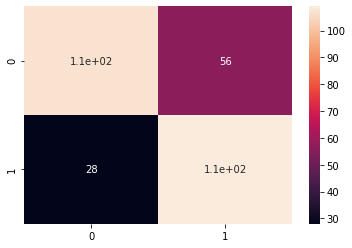

In [79]:
from sklearn.metrics import classification_report, confusion_matrix
# Predicting the Test set results
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [80]:
#naive bayes result:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72       163
           1       0.66      0.80      0.72       137

    accuracy                           0.72       300
   macro avg       0.73      0.73      0.72       300
weighted avg       0.73      0.72      0.72       300



### Comparative model analysis

In [ ]:
#See the full tweets randomly

In [120]:
# Print out the full tweet of a few rows
import random
tweets = tw_data.drop(columns=['label']) 
for i in range(100):
    row = random.randint(0,len(tweets))
    print('Example-{}:'.format(i+1), )
    print(f'Tweet at Row {row}')
    print(tweets['tweet'].loc[row])
    print('\n')

Example-1:
Tweet at Row 1382
idiomas a un país que es tan mediocre que acepta estos comportamientos y declaraciones en la máxima institución?? Es vergonzoso. Sois vergonzosos. Te imaginas a la Merkel: KOOOOOOOOOOOOOOMMMMMOOO??? K LOS ESPAÑOLES TIENEN TURISMO POR EL HECHO DE NACER EN UN PAÍS DONDE HAY SOL,


Example-2:
Tweet at Row 361
Heil Merkel!


Example-3:
Tweet at Row 564
Euro­pa macht die Gren­zen dicht – mit oder ohne Mer­kel | NZZ Quelle: Europa macht die Grenzen dicht – mit oder ohne Merkel | NZZ


Example-4:
Tweet at Row 102
Infection rates in #Germany vary greatly from region to region and many people are longing for some relaxation. The partial #lockdown will nevertheless be extended until 10th January, with the exception of #holidays. Angela #Merkel explains why. #NewsDE


Example-5:
Tweet at Row 1489
Merkel'in çıplaklar kampında çekilmiş fotoğrafı! Almanlar'ın %1 ilgilendi bu fotoğrafla, geriye kalan kısım ilgilenmedi onu geçmişi ile yargılamadılar. "Onun soyunması bizi i

In [121]:
list(tweets)

['language', 'tweet', 'issue', 'length']

In [123]:
#check data balance
tw_data['label'].value_counts()

0    801
1    699
Name: label, dtype: int64

### Text Cleaning:
    -Remove the urls and weblinks
    -Split into sentences
    -Split into words
    -Filter out Punctuation
    -Filter out Stop Words
    -Stem Words
    -Lemmatization

In [93]:
#Remove the urls and weblinks
def rem_url(text):
    '''This function removes the urls from the text. Alternatively use lambda functions'''
    new_text = re.sub(r'http\S+','',str(text)) 
    new_text = re.sub(r'@\S+','',new_text) # get rid of all the name referrals as in @stemgrk
    return new_text

In [103]:
#Split into sentences
def sent_text(text):
    '''This function will return the sentences from the tweets'''
    text = str(text)
    sentences = sent_tokenize(text)
    return sentences

In [84]:
#Split into words
def to_lower(text):
    ''' Convert the string to lower case'''
    ## first split on spaces 
    text_split = text.split()
    word_list = []
    
    for word in text_split:        
        if type(word) == str:
            word_ = word.lower()
            word_list.append(word_)
        new_text = ' '.join(word_list)
    return new_text     

In [85]:
#Filter out Punctuation
def split_words(text):
    '''This function splits the sentences into words and filters out the punctuations'''
    tokens = word_tokenize(text)
    # filter out the punctuations
    words = [word for word in tokens if word.isalpha()]
    return words

In [86]:
#Filter out Stop Words
def stop_word(text):
    '''This function will filter out the stop words from the word tokens'''
    stop_words = stopwords
    words = [word for word in text if not word in stop_words]
    return words

In [87]:
#Stem Words
def stem_word(text):
    '''This function performs stemming -- Returns the root form of the word'''
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in text]
    return stemmed

In [88]:
#Lemmatization
def lemma_word(text):
    '''This function performs lemmatization'''
    lemmatizer = WordNetLemmatizer()
    word_lemma = [lemmatizer.lemmatize(word) for word in text]
    return word_lemma

In [106]:
test_for_functions = "I Am 57 years old and my @purpose is #greatAmerica's Idea = ___http://www.test.com & say just No!!!!!WOWWWWWWWW"

In [107]:
rem_url(test_for_functions)

"I Am 57 years old and my  is #greatAmerica's Idea = ___ & say just No!!!!!WOWWWWWWWW"

In [108]:
sent_text(test_for_functions)

["I Am 57 years old and my @purpose is #greatAmerica's Idea = ___http://www.test.com & say just No!!!!",
 '!WOWWWWWWWW']

In [109]:
to_lower(test_for_functions)

"i am 57 years old and my @purpose is #greatamerica's idea = ___http://www.test.com & say just no!!!!!wowwwwwwww"

In [112]:
split_words(test_for_functions)

['I',
 'Am',
 'years',
 'old',
 'and',
 'my',
 'purpose',
 'is',
 'greatAmerica',
 'Idea',
 'say',
 'just',
 'No',
 'WOWWWWWWWW']

In [113]:
stop_word(test_for_functions)

['I',
 ' ',
 'A',
 'm',
 ' ',
 '5',
 '7',
 ' ',
 'y',
 'e',
 'r',
 's',
 ' ',
 'o',
 'l',
 'd',
 ' ',
 'n',
 'd',
 ' ',
 'm',
 'y',
 ' ',
 '@',
 'p',
 'u',
 'r',
 'p',
 'o',
 's',
 'e',
 ' ',
 's',
 ' ',
 '#',
 'g',
 'r',
 'e',
 't',
 'A',
 'm',
 'e',
 'r',
 'c',
 "'",
 's',
 ' ',
 'I',
 'd',
 'e',
 ' ',
 '=',
 ' ',
 '_',
 '_',
 '_',
 'h',
 't',
 't',
 'p',
 ':',
 '/',
 '/',
 'w',
 'w',
 'w',
 '.',
 't',
 'e',
 's',
 't',
 '.',
 'c',
 'o',
 'm',
 ' ',
 '&',
 ' ',
 's',
 'y',
 ' ',
 'j',
 'u',
 's',
 't',
 ' ',
 'N',
 'o',
 '!',
 '!',
 '!',
 '!',
 '!',
 'W',
 'O',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W']

In [114]:
stem_word(test_for_functions)

['I',
 ' ',
 'A',
 'm',
 ' ',
 '5',
 '7',
 ' ',
 'y',
 'e',
 'a',
 'r',
 's',
 ' ',
 'o',
 'l',
 'd',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'm',
 'y',
 ' ',
 '@',
 'p',
 'u',
 'r',
 'p',
 'o',
 's',
 'e',
 ' ',
 'i',
 's',
 ' ',
 '#',
 'g',
 'r',
 'e',
 'a',
 't',
 'A',
 'm',
 'e',
 'r',
 'i',
 'c',
 'a',
 "'",
 's',
 ' ',
 'I',
 'd',
 'e',
 'a',
 ' ',
 '=',
 ' ',
 '_',
 '_',
 '_',
 'h',
 't',
 't',
 'p',
 ':',
 '/',
 '/',
 'w',
 'w',
 'w',
 '.',
 't',
 'e',
 's',
 't',
 '.',
 'c',
 'o',
 'm',
 ' ',
 '&',
 ' ',
 's',
 'a',
 'y',
 ' ',
 'j',
 'u',
 's',
 't',
 ' ',
 'N',
 'o',
 '!',
 '!',
 '!',
 '!',
 '!',
 'W',
 'O',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W']

In [110]:
lemma_word(test_for_functions)

['I',
 ' ',
 'A',
 'm',
 ' ',
 '5',
 '7',
 ' ',
 'y',
 'e',
 'a',
 'r',
 's',
 ' ',
 'o',
 'l',
 'd',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'm',
 'y',
 ' ',
 '@',
 'p',
 'u',
 'r',
 'p',
 'o',
 's',
 'e',
 ' ',
 'i',
 's',
 ' ',
 '#',
 'g',
 'r',
 'e',
 'a',
 't',
 'A',
 'm',
 'e',
 'r',
 'i',
 'c',
 'a',
 "'",
 's',
 ' ',
 'I',
 'd',
 'e',
 'a',
 ' ',
 '=',
 ' ',
 '_',
 '_',
 '_',
 'h',
 't',
 't',
 'p',
 ':',
 '/',
 '/',
 'w',
 'w',
 'w',
 '.',
 't',
 'e',
 's',
 't',
 '.',
 'c',
 'o',
 'm',
 ' ',
 '&',
 ' ',
 's',
 'a',
 'y',
 ' ',
 'j',
 'u',
 's',
 't',
 ' ',
 'N',
 'o',
 '!',
 '!',
 '!',
 '!',
 '!',
 'W',
 'O',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W']

In [111]:
stem_word(test_for_functions)

['I',
 ' ',
 'A',
 'm',
 ' ',
 '5',
 '7',
 ' ',
 'y',
 'e',
 'a',
 'r',
 's',
 ' ',
 'o',
 'l',
 'd',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'm',
 'y',
 ' ',
 '@',
 'p',
 'u',
 'r',
 'p',
 'o',
 's',
 'e',
 ' ',
 'i',
 's',
 ' ',
 '#',
 'g',
 'r',
 'e',
 'a',
 't',
 'A',
 'm',
 'e',
 'r',
 'i',
 'c',
 'a',
 "'",
 's',
 ' ',
 'I',
 'd',
 'e',
 'a',
 ' ',
 '=',
 ' ',
 '_',
 '_',
 '_',
 'h',
 't',
 't',
 'p',
 ':',
 '/',
 '/',
 'w',
 'w',
 'w',
 '.',
 't',
 'e',
 's',
 't',
 '.',
 'c',
 'o',
 'm',
 ' ',
 '&',
 ' ',
 's',
 'a',
 'y',
 ' ',
 'j',
 'u',
 's',
 't',
 ' ',
 'N',
 'o',
 '!',
 '!',
 '!',
 '!',
 '!',
 'W',
 'O',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W']

In [239]:
#Join the list to form the cleaned text

In [117]:
def join_list(text):
    '''This function will perform the join operation'''
    join_text = ' '.join(text)
    return join_text

In [139]:
train = tw_data

In [135]:
#downloading the test data 
file = 'tw_merkel_test.xlsx'
xl = pd.ExcelFile(file)
print(xl.sheet_names)

['Sheet1']


In [136]:
test = xl.parse('Sheet1')
test

,id,tweet
0,1,"German, Greek MEPs urge Merkel to halt deliver..."
1,2,Merkel is a great leader
2,3,his is the way a real leader looks and sounds ...
3,4,Merkel desesperada porque su país de 100 millo...
4,5,POTUS reaches out to Merkel in his customary '...
...,...,...
646,647,Das macht Merkel doch genau so!
647,648,Merkel kann mich mal..
648,649,Wenn Merkel wenigstens so aussehen würde wie N...
649,650,Unfassbar was hier in diese doch recht simple ...


In [138]:
test = test.drop(columns=['id'])
test

,tweet
0,"German, Greek MEPs urge Merkel to halt deliver..."
1,Merkel is a great leader
2,his is the way a real leader looks and sounds ...
3,Merkel desesperada porque su país de 100 millo...
4,POTUS reaches out to Merkel in his customary '...
...,...
646,Das macht Merkel doch genau so!
647,Merkel kann mich mal..
648,Wenn Merkel wenigstens so aussehen würde wie N...
649,Unfassbar was hier in diese doch recht simple ...


In [145]:
clean_test_list =  [to_lower,rem_url,split_words,stop_word,lemma_word,join_list]
for function in clean_test_list:
    train['tweet'] = train['tweet'].apply(function)
    test['tweet'] = test['tweet'].apply(function)
    
# print a sample of cleaned text 
print(train['tweet'][random.randint(0,len(train))])
print(test['tweet'][random.randint(0,len(test))])

weihnachtsregelung kann alle bisherigen maßnahmen und erfolge zunichte machen lockdown merkel lauterbach
gott schütze die e von innerer weisheit gelenkt gg jeglichen widerstand geschafft hat die fassade einer fremdbest besatzungsverwaltung brd derart gegen die wand zu fahren da die jahren umerzogenen langsam ihre wahre heimat neuentdecken da heilige dr


__Dividing train and vaidation data set:__ 

In this step, it is better to split the training dataset into training and validation set and test various models before applying text vectorization. The best model will be chosen to predict the test data set.

In [146]:
X = train['tweet']
y = train['label']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [147]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1200,), (1200,), (300,), (300,))

__Text Vectorization__

In [148]:
tfidf = TfidfVectorizer(min_df=2,max_df=0.95,ngram_range=(1,2))

In [149]:
X_train = tfidf.fit_transform(X_train)
#y_train = to_categorical(y_train)

In [150]:
X_test = tfidf.transform(X_test)
#y_test = to_categorical(y_test)

__Note: Linear regression only detects numbers is problematic if there is a string__


__Cross Validation__

In [151]:
import warnings
warnings.filterwarnings(action='ignore',message='')

In [ ]:
 def cross_validate(X=X_train,y=y_train):
    '''This function will test various models using cross validation and 
       prints out the mean and standard deviation. The best performing model will be 
       used for further fine tuning using Grid search. Due to time constraint, ensemble techniques have been
       excluded.'''
    
    #warnings.filterwarnings(action='ignore',message='')
    
    #create a list of models to be cross validated
    models = []
    models.append(('Naive Bayes',MultinomialNB()))
    models.append(('Logistic Regression',LogisticRegression()))
    #models.append(('Random Forest',RandomForestClassifier()))
    #models.append(('Gradient Boosting',GradientBoostingClassifier()))
    #models.append(('XG Boost',XGBClassifier()))
    models.append(('Linear SVC',LinearSVC()))
    models.append(('Decision Tree',DecisionTreeClassifier()))
    
    results = []
    names = []
    scoring = 'f1'
    
    # Cross validate all the models in the list and print the mean and std deviation of the f1 score. 
    for name,model in models:
        kfold = RepeatedStratifiedKFold(random_state=42,n_repeats=10,n_splits=5)
        cv_results = cross_val_score(model,X,y,cv=kfold,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print (f'Model:{name},Mean:{cv_results.mean()},Std Dev: {cv_results.std()}') 
        # Cross validate all the models in the list and print the mean and std deviation of the f1 score. 
    for name,model in models:
        kfold = RepeatedStratifiedKFold(random_state=42,n_repeats=10,n_splits=5)
        cv_results = cross_val_score(model,X,y,cv=kfold,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print (f'Model:{name},Mean:{cv_results.mean()},Std Dev: {cv_results.std()}')    

In [154]:
cross_validate(X_train,y_train)

Model:Naive Bayes,Mean:0.68228657529659,Std Dev: 0.023517001793494773
Model:Logistic Regression,Mean:0.642571868737069,Std Dev: 0.03533829703896974
Model:Linear SVC,Mean:0.6387732161678046,Std Dev: 0.03109272020373008
Model:Decision Tree,Mean:0.554931970735128,Std Dev: 0.03215761807842777
Model:Naive Bayes,Mean:0.68228657529659,Std Dev: 0.023517001793494773
Model:Logistic Regression,Mean:0.642571868737069,Std Dev: 0.03533829703896974
Model:Linear SVC,Mean:0.6387732161678046,Std Dev: 0.03109272020373008
Model:Decision Tree,Mean:0.5607183942849477,Std Dev: 0.03766190721720665


In [169]:
#We will get the best f1 score. Let's try to calculate this ourselves first.
#The main reason for using the F1 Score value instead of Accuracy is not to make an incorrect model selection in non-uniform data sets.
#In addition, F1 Score is very important to us as we need a measurement metric that includes not only False Negative or False Positive, but also all error costs.

__Prediction on the validation set__

In [159]:
nb_model = MultinomialNB()
nb_model.fit(X_train,y_train)

MultinomialNB()

In [160]:
y_test_predict = nb_model.predict(X_test)

In [161]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71       157
           1       0.68      0.71      0.69       143

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300



After choosing the Naive Bayes model, there are things to do to predict the test data. Accordingly, first of all:

    - We will apply the Naive Bayes to the entire train set
    - generate predictions in test data set

__Create pipeline for vectorizer and model__

In [163]:
text_nb_clf = Pipeline([('tfidf',TfidfVectorizer(max_df=0.95,min_df=2,ngram_range=(1,2))),
                       ('Naive Bayes',MultinomialNB())])

In [170]:
text_nb_clf.fit(X,y)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.95, min_df=2, ngram_range=(1, 2))),
                ('Naive Bayes', MultinomialNB())])

__Prediction on the test dataset__

In [172]:
test_vector = test['tweet']
y_pred = text_nb_clf.predict(test_vector)

In [179]:
submission =  test.copy()
submission['label'] = y_pred

In [180]:
submission.to_csv('submission.csv',index=False)

In [181]:
result = pd.read_csv('submission.csv')
result

,tweet,label
0,german greek meps urge merkel halt delivery ge...,1
1,merkel great leader,0
2,way real leader look sound like wir sind stolz...,0
3,merkel desesperada porque su país de millones ...,0
4,potus reach merkel customary boob greeting,0
...,...,...
646,da macht merkel doch genau,1
647,merkel kann mich mal,1
648,wenn merkel wenigstens aussehen würde wie nil ...,1
649,unfassbar hier diese doch recht simple aussage...,1


In [183]:
result['label'].value_counts()

1    438
0    213
Name: label, dtype: int64